In [88]:
# Prediction of image from fashion clothing datasets which is available in tensorflow dataset
# using Artificial neural network.

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.0.0-alpha0


In [6]:
mnist=tf.keras.datasets.fashion_mnist

In [7]:
#fashion mnist data is directly available in tensorflow.keras.datasets we simply load it.

In [12]:
print(mnist.load_data())

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [13]:
(training_images, training_labels), (testing_images, testing_labels)=mnist.load_data()

In [14]:
# load_data() will load whole data of mnist and split into two parts testing and training sets of list that will
# contain the clothing images and their corresponding labels.

In [32]:
import numpy as np
np.set_printoptions(linewidth=200) 

In [33]:
# array is too large to be printed
#NumPy automatically skips the central part of the array and only prints the corners: To 
#disable this behaviour and force NumPy to print the entire array, you can change the printing
#options using set_printoptions

In [34]:
# Now lets try to see how images are look like using the library matplotlib.

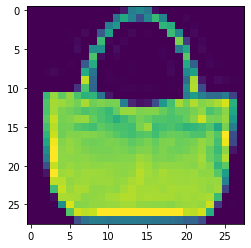

In [37]:
import matplotlib.pyplot as plt
plt.imshow(training_images[100])

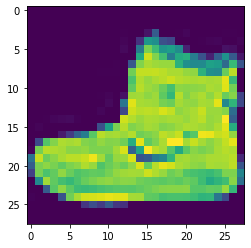

In [38]:
plt.imshow(training_images[0])

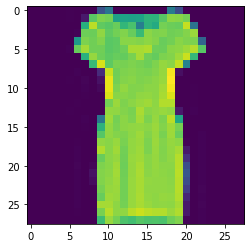

In [39]:
plt.imshow(training_images[20])

In [40]:
print(training_labels[20])

3


In [41]:
# We can see the labels at index 20 corresponds to each image in the array like label at index 20 is 3 and
# is a shirt.
# 

In [43]:
print(training_images[20]) # printing pixel grey value

[[  0   0   0   0   0   1   0   0   0  65  99   0   0   0   0   0   0   0 106  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0  17 190 206 202 145 148 146 148 166 165 189 212 210 202   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 160 229 193 189 197 169 182 109 165 156 202 198 196 233  96   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 199 198 213 193 201 207 196 172 211 206 207 200 202 208 217   0   0   0   0   0   0]
 [  0   0   0   0   0   0 139 205 200 207 190 192 210 210 208 212 208 197 201 210 206 205  83   0   0   0   0   0]
 [  0   0   0   0   0   2 196 220 200 200 190 193 199 222 222 225 199 198 210 212 218 227 189   0   0   0   0   0]
 [  0   0   0   0   0   0   0 162 215 199 192 196 195 204 221 200 195 205 208 218 235 170   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 172 240 192 204 203 206 203 199 206 215 211 232 114   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0  32 235 200 206 208 205 204 208 215 252  1

In [44]:
# and here we can see all the values are between 0 to 255. if we are using our neural network for various reason
# then it is easier if we treat all values between 0 and 1 and this process is called normalization.
# in python its very easy to normalise a list.
#neural network better works with normalised data.

In [45]:
training_images=training_images/255.0
testing_images=testing_images/255.0

In [46]:
# now lets design our model
# Inpute layers in the shape of the data.
# Output layers in the shape of the classes.
# one hidden layer that tries to figure out roles between them.

In [47]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [48]:
#Sequential is used to define a sequence of the layers in the neural network
#Flatten just takes squares and turns it into a 1 dimentional set.
#Dense is used to adds a layers of neurons.
#each layer of neurons need activation function to tell them what to do
# Relu just means if X>0 then return X else Return 0 it means it only passes values 0 or greater to the next layer
#in the network.
# softmax takes a set of values, picks biggest one and make that 1 and others 0. like [0.5,2.3,5.8,1.2] then it
# turns into [0,0,1,0]

In [49]:
# Now compile the model
#we need loss function and optimizer function in order to compile. to make the guess what is the relationship it
# is between the input data and output data measures well how bad or good it is.

In [50]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# we try to fit the training images to the training labels with eposh 5 to be quick.

In [52]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.4982 - accuracy: 0.8244
Epoch 2/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3775 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3388 - accuracy: 0.8763
Epoch 4/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3108 - accuracy: 0.8865
Epoch 5/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.2968 - accuracy: 0.8916


In [65]:
# it works well on the training image but the better measure of performance is by trying the test data.
# this are the images(testing images) that network hasn't seen.
# we dont have expect performance to be worst on test data but much worst accuracy is not excepted.
# as we can see there is only 0.3557 loss means it is little bit less accurate on the test set. and accuracy is 87%

In [66]:
model.evaluate(testing_images, testing_labels)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3557 - accuracy: 0.8736


[0.35569809435606004, 0.8736]

In [35]:
#now lets do prediction

In [57]:
classification=model.predict(testing_images)

In [59]:
print(classification)

[[3.8105751e-05 5.3880784e-09 3.0044049e-07 ... 9.0112656e-02 1.2320369e-05 9.0687996e-01]
 [3.0385390e-05 2.0984338e-10 9.9886644e-01 ... 6.7665952e-14 6.2896848e-09 1.3741150e-13]
 [2.0932162e-05 9.9997866e-01 9.4838946e-08 ... 6.9863413e-13 1.1550360e-09 5.2010679e-12]
 ...
 [3.5101620e-03 3.2675100e-08 5.0801277e-04 ... 5.2716433e-07 9.9093550e-01 2.8319869e-09]
 [4.7829681e-06 9.9995327e-01 9.6493147e-07 ... 9.7744229e-11 1.3225967e-08 7.6992262e-07]
 [2.4181211e-04 2.5107079e-06 7.5154268e-05 ... 2.0893430e-02 5.3681427e-04 1.7166944e-04]]


In [78]:
print(classification[0])

[3.8105751e-05 5.3880784e-09 3.0044049e-07 3.7854412e-07 1.4514292e-06 2.9288391e-03 2.5939613e-05 9.0112656e-02 1.2320369e-05 9.0687996e-01]


In [79]:
#The 10th element on the list is the biggest, and the ankle boot is labelled 9
# these 10 number shows the probability of classified image. ie the first value in this list shows that the
# probability that the image is of a '0'(Tshirt/top), the next is a '1'(trouser) etc.
# all have less probability except 10th element. and we have classified our image from 0 to 9
# so that 10th element which has highest probability would be 9(ankle boot).
# here neural network is predicting most likely to be ankle boot. 
# to check it just print index label 0. we will get 9 i.e ankle boot.

In [81]:
print(testing_labels[0])

9


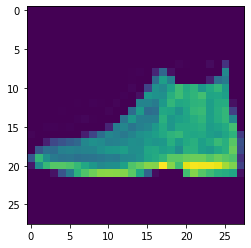

In [87]:
plt.imshow(testing_images[0])

In [82]:
print(classification[2])

[2.0932162e-05 9.9997866e-01 9.4838946e-08 8.7760881e-08 1.3160417e-07 3.4616936e-15 1.7143520e-08 6.9863413e-13 1.1550360e-09 5.2010679e-12]


In [83]:
print(testing_labels[2])

1


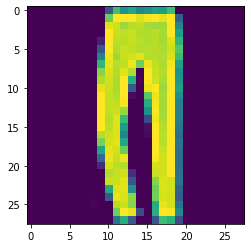

In [85]:
plt.imshow(testing_images[2])

In [90]:
for i in range(0, len(testing_images)):
    print(classification[i])

[3.8105751e-05 5.3880784e-09 3.0044049e-07 3.7854412e-07 1.4514292e-06 2.9288391e-03 2.5939613e-05 9.0112656e-02 1.2320369e-05 9.0687996e-01]
[3.0385390e-05 2.0984338e-10 9.9886644e-01 8.5312815e-09 7.5947616e-04 2.5862168e-11 3.4380954e-04 6.7665952e-14 6.2896848e-09 1.3741150e-13]
[2.0932162e-05 9.9997866e-01 9.4838946e-08 8.7760881e-08 1.3160417e-07 3.4616936e-15 1.7143520e-08 6.9863413e-13 1.1550360e-09 5.2010679e-12]
[3.2281062e-06 9.9998558e-01 3.2043582e-07 1.0617137e-05 2.4747902e-07 7.8115021e-13 2.0557225e-08 9.6445931e-13 4.6104945e-10 8.9662683e-10]
[3.1666571e-01 1.1046173e-05 1.5985312e-01 2.3508144e-03 7.3261880e-03 8.3713303e-06 5.0344908e-01 1.1992018e-05 1.0298435e-02 2.5219389e-05]
[7.6150184e-04 9.9921334e-01 4.0317359e-06 1.7421834e-06 4.2951183e-06 4.6358560e-13 1.5073956e-05 4.1507825e-11 3.2743880e-08 8.3346170e-11]
[1.7509557e-04 2.4198653e-06 1.3009914e-02 4.9240720e-05 9.8034060e-01 1.9184762e-08 6.3820146e-03 6.1507945e-09 4.0792725e-05 6.6972282e-11]
[3.258

[3.3196056e-01 7.2522397e-04 6.7089327e-02 4.6328932e-02 1.2678365e-04 3.2797040e-08 5.5364233e-01 1.2911577e-10 1.2669891e-04 6.6539911e-09]
[5.3200042e-06 4.6352053e-08 8.2148216e-07 3.8334015e-06 3.2726760e-07 2.6185855e-03 5.8310807e-06 9.9734169e-01 1.4256037e-05 9.4331126e-06]
[4.8512974e-04 1.3558902e-06 1.1452496e-04 2.4783767e-06 9.2554641e-05 9.8888397e-01 6.2546303e-04 7.9505295e-03 3.1602362e-04 1.5278589e-03]
[4.0968359e-03 7.1190093e-03 9.5526930e-03 4.7721077e-02 9.1941768e-01 1.5319051e-07 6.2570586e-03 2.4304809e-06 5.8122338e-03 2.0837049e-05]
[9.3657989e-05 8.3673321e-08 4.7666576e-06 1.5652566e-07 1.6763145e-06 9.9094605e-01 4.4635111e-05 8.8820243e-03 1.7353463e-05 9.6317044e-06]
[8.0872141e-08 2.9062368e-14 5.6212110e-12 1.8373643e-11 1.0661936e-11 2.8352565e-06 3.9251699e-10 2.1681821e-05 7.2322057e-12 9.9997544e-01]
[3.6236668e-07 1.5257515e-10 1.8298448e-09 3.4335368e-10 2.7968563e-09 9.9999154e-01 7.7935304e-08 6.2913646e-06 5.4710466e-07 1.0838294e-06]
[5.609

[8.7212366e-01 1.0908237e-03 2.0703732e-03 3.2137677e-02 1.4769912e-02 7.5252432e-10 7.7726342e-02 1.9741217e-08 7.9946643e-05 1.1863448e-06]
[3.3828380e-04 8.3072018e-07 9.9634451e-01 3.6049565e-07 1.5205374e-03 4.3394945e-08 1.7954077e-03 1.5082474e-10 1.4832263e-07 4.2169346e-10]
[7.0234376e-04 1.7316180e-04 8.2733035e-03 9.8875719e-01 1.6358186e-03 5.5789755e-09 3.3529001e-04 3.2406830e-10 1.2291488e-04 2.1407784e-08]
[2.7191780e-05 7.8438859e-08 3.2514054e-05 2.0879531e-06 3.4871846e-05 3.2211835e-07 2.1655735e-04 3.5805844e-08 9.9965894e-01 2.7442264e-05]
[7.0987048e-04 5.2066628e-07 9.8865056e-01 5.5359315e-06 1.0221624e-02 2.8298802e-12 4.1079571e-04 3.0304848e-10 1.0593448e-06 3.2911290e-10]
[4.8580088e-05 7.7624727e-06 8.8384783e-01 3.1902681e-07 1.1064362e-01 2.9053011e-09 5.4515465e-03 6.5481141e-11 2.2808821e-07 2.3878557e-11]
[6.66130334e-02 8.74085288e-07 1.31339577e-04 5.64435641e-06 1.01936635e-07 3.41581585e-09 9.26590383e-01 9.80460765e-12 6.65862020e-03 2.44634469e-

[4.11999505e-03 3.52596631e-04 1.05834045e-01 3.31545505e-03 5.34547746e-01 1.14327464e-04 3.45697790e-01 3.67208486e-05 5.97918406e-03 2.05564061e-06]
[7.51801463e-06 9.77673831e-10 3.47251239e-06 1.08074555e-05 1.60555181e-04 4.58719249e-08 5.65839127e-06 1.11181009e-09 9.99811947e-01 1.47192258e-10]
[2.7408291e-02 1.9878435e-06 6.8652004e-01 2.5414519e-03 9.1802329e-03 4.7113451e-09 2.7403510e-01 5.8397136e-09 3.1299531e-04 5.9659904e-08]
[2.7395082e-01 3.7549999e-05 1.4630948e-02 7.6691158e-02 1.1747460e-03 9.7291259e-09 6.3251072e-01 4.6109781e-07 1.0035939e-03 1.0797467e-07]
[1.26371597e-04 7.53686545e-05 3.56993498e-03 1.21877551e-01 8.63000035e-01 1.17081156e-09 1.11355055e-02 2.37510389e-09 2.15280437e-04 3.52964591e-09]
[6.1980087e-01 5.6406385e-05 2.8487544e-03 1.6956835e-04 9.2949020e-05 1.0533046e-06 3.7549737e-01 6.9298274e-08 1.5323607e-03 6.0054128e-07]
[1.2980826e-04 1.4367861e-06 9.9519581e-01 3.1233765e-07 2.8262306e-03 1.1164689e-07 1.8460703e-03 8.5558155e-10 1.519

[4.2759202e-04 2.5211237e-03 1.2433424e-03 9.9387556e-01 2.6888357e-04 5.1277306e-07 8.3187639e-05 2.2629333e-08 1.5682516e-03 1.1521105e-05]
[6.0117641e-06 8.0358076e-09 3.9782090e-06 6.7387759e-07 8.5264664e-06 5.5341970e-05 1.4961010e-06 9.8573686e-08 9.9992383e-01 3.7463994e-11]
[1.8964302e-02 4.9099144e-06 9.1677213e-01 6.8702712e-04 1.3846476e-02 4.7741846e-08 4.9585462e-02 3.3575935e-07 1.3918245e-04 2.6422843e-08]
[9.94914412e-01 7.79120271e-08 1.41560740e-04 2.17616289e-05 1.28250974e-08 5.19268552e-11 4.92205797e-03 2.87245045e-16 1.02597205e-07 1.15752711e-11]
[1.3958422e-03 2.1884320e-05 2.5876369e-02 3.1731214e-02 8.4569639e-01 2.7794638e-09 9.5236927e-02 9.3430363e-10 4.1365580e-05 1.4565009e-09]
[3.1597968e-02 2.1212643e-03 4.8726410e-02 9.8412022e-02 6.2915456e-01 8.6380467e-05 1.8519236e-01 5.2116800e-04 4.1123838e-03 7.5622193e-05]
[1.2971306e-03 1.5525440e-08 1.0551714e-03 3.3863209e-06 6.7312457e-03 6.8250313e-07 9.9912006e-04 2.6096630e-10 9.8991323e-01 4.7776136e-

[2.6118253e-06 1.3954550e-09 3.8996959e-08 5.9387048e-06 1.1962433e-07 2.0664188e-03 4.7091248e-06 9.9560553e-01 1.4587695e-05 2.3000378e-03]
[1.0957967e-02 2.0476625e-07 9.5930260e-01 3.1875374e-05 7.0168143e-03 9.0418246e-12 2.2660330e-02 1.2984422e-10 3.0200592e-05 9.9554365e-09]
[1.0104093e-07 6.2663885e-10 1.7615525e-06 1.1532801e-05 8.4005878e-06 5.5625799e-07 3.0796721e-07 3.1946758e-08 9.9997735e-01 1.3696184e-10]
[5.6526420e-07 9.9999940e-01 6.8427761e-09 1.6701625e-09 8.1198470e-09 9.4835502e-19 3.4657713e-10 4.8522563e-16 4.6318843e-12 5.7121911e-15]
[7.5450288e-08 1.6641564e-13 4.1162096e-10 1.0737283e-10 2.4864486e-09 1.0924907e-09 3.8187220e-08 2.9086913e-11 9.9999988e-01 1.2659825e-09]
[9.19709146e-01 1.18697435e-05 6.16644882e-03 1.31991040e-03 4.37276458e-06 1.22090671e-06 7.27494285e-02 1.84546389e-11 3.75679883e-05 7.75318370e-08]
[7.05335697e-06 5.29874988e-08 2.69387726e-07 1.30553581e-05 1.02246396e-07 2.02929392e-03 5.24498000e-06 9.97573197e-01 6.78140668e-06 3.

[9.9577880e-01 2.3838638e-05 1.3536778e-04 1.8875486e-04 1.9731260e-06 1.0975177e-10 3.8379196e-03 1.7400718e-12 3.3235840e-05 5.3804765e-09]
[5.9334706e-09 8.6125149e-11 1.2751315e-10 6.6037693e-08 1.3908429e-10 3.9978616e-04 1.1547561e-08 9.9955469e-01 1.8439704e-06 4.3512660e-05]
[5.0416838e-02 5.1103240e-01 1.0891899e-02 3.9799625e-01 5.7064146e-03 3.7054573e-07 2.2686485e-02 7.1685027e-09 1.2691623e-03 1.3835617e-07]
[1.2608792e-03 3.9755609e-02 2.1477598e-04 9.5788401e-01 3.8331252e-04 4.2894303e-06 4.5081449e-04 2.0179460e-09 9.5644027e-06 3.6690828e-05]
[2.4404624e-03 3.5999854e-08 9.9531555e-01 1.1204706e-06 1.4563740e-03 1.5736372e-13 7.8491005e-04 1.2395364e-11 1.5962062e-06 1.3662744e-09]
[4.6680674e-01 5.2570220e-05 7.4594822e-03 2.6350820e-03 1.0286837e-05 5.4138462e-07 5.2300495e-01 3.9804030e-10 3.0293257e-05 1.7610471e-08]
[1.9782447e-04 9.5325659e-06 8.9208245e-01 1.7805865e-05 1.0696274e-01 1.3246854e-09 7.2251126e-04 7.7373913e-11 7.0757910e-06 9.7329658e-11]
[3.189

[6.1921889e-07 9.9999940e-01 8.2808133e-10 4.4225135e-09 2.2418695e-10 2.5418160e-17 4.5171755e-10 3.2400506e-17 7.3144328e-13 2.1786169e-14]
[4.7784531e-04 4.6131126e-07 1.5349982e-04 3.6251356e-06 4.6531488e-05 9.8610848e-01 3.2267114e-04 1.2064713e-02 8.0368196e-04 1.8533958e-05]
[3.3058609e-07 1.4609996e-11 5.6698690e-10 4.3670437e-10 2.1645798e-09 1.0752922e-04 7.8316759e-08 1.8691106e-03 6.2578791e-09 9.9802291e-01]
[3.14633176e-02 9.11206662e-05 2.49907732e-01 4.94831830e-01 1.92160532e-01 2.17359272e-07 3.07373647e-02 1.03461595e-08 8.07854638e-04 6.26263343e-08]
[4.1866184e-05 3.1247887e-06 9.3845598e-02 3.3588363e-05 3.5549593e-01 5.8409416e-08 5.5057687e-01 1.8645347e-09 3.0403373e-06 6.3021166e-10]
[4.9475371e-03 1.7732855e-08 5.1804674e-01 5.7455381e-06 1.3648498e-01 2.2613192e-12 3.4045804e-01 3.7291706e-10 5.6971658e-05 4.7148557e-08]
[2.2570351e-04 2.0288369e-04 1.3984558e-01 1.2040299e-03 8.1315440e-01 4.3092859e-11 4.5113891e-02 3.4217001e-11 2.5354754e-04 9.7473253e-

[0.06764997 0.00107411 0.0416704  0.6128405  0.01446554 0.01054896 0.22725342 0.00154987 0.01591926 0.00702801]
[6.3758075e-01 2.5205660e-04 6.0651457e-04 8.7485407e-03 1.0541634e-04 1.4330326e-05 3.5249567e-01 1.2020636e-06 1.8649327e-04 8.9372770e-06]
[1.2934523e-03 2.7993670e-05 4.0978664e-01 9.8784892e-07 5.6975663e-01 2.2222193e-06 1.9122530e-02 7.9606268e-09 9.5205069e-06 3.1989211e-10]
[5.5500127e-06 2.0003284e-10 3.9141419e-08 1.9215692e-07 1.2267838e-08 4.4253546e-01 6.7029777e-07 1.7664609e-04 9.8030878e-06 5.5727160e-01]
[2.5877897e-02 3.7647051e-06 3.4914659e-03 4.0334038e-04 6.0161715e-03 1.1125109e-07 6.2993236e-02 3.9211696e-05 9.0117401e-01 7.6304809e-07]
[4.3266144e-08 9.1358250e-14 4.8654058e-12 5.3508539e-12 1.0848162e-11 8.1567001e-03 4.8528798e-10 3.5264977e-04 8.5934981e-11 9.9149054e-01]
[4.2042868e-07 1.3581947e-10 5.2186873e-08 8.2499874e-08 4.8649313e-06 2.2757526e-08 6.6530521e-07 1.7823517e-08 9.9999392e-01 1.0564974e-09]
[8.1031260e-08 4.7555862e-11 1.65037

[9.4281571e-10 4.7594633e-15 2.1296645e-11 4.5423563e-13 5.5731399e-11 3.8251173e-11 4.6570059e-10 4.5790804e-14 1.0000000e+00 1.8360202e-13]
[2.8567383e-04 3.0957654e-04 6.2953644e-02 5.7405530e-04 9.2427212e-01 2.4185666e-11 1.1585746e-02 2.3502672e-10 1.9054378e-05 8.3149093e-10]
[9.7382969e-01 1.1938079e-07 1.3382734e-03 2.5151577e-04 1.9091901e-07 1.5168387e-12 2.4579791e-02 9.1984295e-16 3.8089226e-07 2.8372041e-11]
[8.2406830e-03 8.1116036e-03 8.8465475e-02 1.9074310e-02 8.3296716e-01 3.3644142e-08 4.2355169e-02 4.4910479e-07 7.8480795e-04 3.3079843e-07]
[4.3982815e-05 3.5651403e-05 3.9969947e-02 4.3518018e-04 9.5850790e-01 4.1543253e-12 9.0874365e-04 1.1013039e-11 9.8508892e-05 8.8812508e-12]
[8.5159928e-01 2.6542975e-05 3.7879527e-03 2.3469621e-02 1.2448440e-05 8.6481684e-09 1.2106656e-01 2.4955153e-11 3.7569964e-05 3.2530576e-08]
[3.4591040e-04 8.8316949e-05 4.5498047e-02 1.1058749e-03 6.7420030e-01 1.2301350e-09 2.7873123e-01 6.5547157e-10 3.0297664e-05 1.5623371e-10]
[1.805

[4.6042487e-01 3.2852497e-03 2.7809436e-02 9.4193377e-02 1.0272297e-02 3.3119395e-06 3.9966142e-01 2.3611492e-06 4.3453518e-03 2.2939757e-06]
[3.5768244e-04 5.5910775e-08 2.2861695e-02 9.2359305e-06 5.3786594e-02 4.7031551e-10 9.2291391e-01 6.6949468e-09 7.0733244e-05 4.6945985e-09]
[7.7330381e-01 2.2526183e-06 9.6740434e-03 5.7694258e-04 2.4862467e-05 5.4307281e-10 2.1626745e-01 1.6247195e-11 1.5054968e-04 4.8484100e-10]
[2.6567176e-04 7.0446775e-05 6.3903503e-02 1.8136022e-03 9.3004304e-01 5.9720690e-10 3.4504558e-03 8.6593253e-11 4.5336509e-04 4.2665621e-11]
[3.6182514e-06 1.3344637e-10 7.4450748e-09 1.5895038e-10 1.3123515e-07 9.9994504e-01 1.3796546e-07 4.5133849e-05 2.0079153e-06 3.8233338e-06]
[6.7484769e-04 1.9280160e-04 1.5875332e-02 4.3014303e-01 5.4494363e-01 5.4092446e-09 8.0694668e-03 5.1918964e-10 1.0086968e-04 6.4957382e-09]
[1.0138608e-03 1.5788530e-04 4.9562097e-02 1.6279571e-04 9.1292089e-01 9.2831237e-10 3.6050841e-02 2.5717202e-07 1.3142699e-04 1.9375304e-10]
[2.247

[7.85325561e-03 1.35566555e-02 5.68447858e-02 2.40827486e-01 6.74360394e-01 8.20882207e-09 5.64335147e-03 6.43525677e-09 9.13765747e-04 2.45839971e-07]
[2.3455775e-06 2.6898655e-05 9.5705949e-03 2.1489575e-05 9.9015665e-01 3.4963644e-15 2.1967373e-04 1.7938357e-14 2.3845425e-06 3.1680980e-14]
[2.9637499e-04 4.5095387e-08 9.6619886e-01 1.4750787e-05 2.0698935e-02 3.5440578e-11 1.2774901e-02 2.3233292e-10 1.6082777e-05 2.3687236e-10]
[1.0286282e-06 1.2143352e-08 1.0373260e-01 9.3622521e-06 8.7847173e-01 3.5987211e-12 1.7785234e-02 1.5520004e-12 2.4119604e-08 1.9725149e-13]
[2.1930227e-01 2.0707365e-02 8.1329398e-02 5.5704862e-01 5.5004843e-02 2.2304530e-05 5.1197603e-02 2.9379587e-06 1.5368130e-02 1.6487584e-05]
[1.6608681e-08 1.4569448e-12 1.3904461e-09 3.2989993e-09 4.5785450e-10 1.0055371e-04 6.6760408e-10 3.1699768e-05 2.6289677e-09 9.9986768e-01]
[2.5118045e-08 7.2961224e-15 1.1400964e-12 4.7197493e-12 9.0523309e-15 1.0460430e-03 4.7077762e-11 5.4695533e-04 8.0917450e-13 9.9840695e-

[3.5833642e-01 9.8851187e-06 6.1841006e-03 5.9191399e-04 1.0603353e-05 1.6643032e-08 6.3479042e-01 9.2987965e-11 7.6674682e-05 2.4716813e-09]
[2.7516404e-07 3.2920966e-10 2.7909954e-09 5.4954448e-08 8.6688923e-09 7.5470518e-05 1.4232081e-07 8.2620297e-04 6.1466757e-08 9.9909770e-01]
[3.4388282e-05 7.9338074e-09 1.1143705e-06 4.1927315e-08 2.1891558e-06 9.9987912e-01 1.4914480e-05 2.7672955e-05 4.0063052e-05 4.2426174e-07]
[4.0912572e-01 9.5777977e-03 3.5005845e-02 5.4106927e-01 3.4844250e-04 5.5931996e-05 3.8691917e-03 3.7345202e-08 9.3531224e-04 1.2455242e-05]
[2.5368159e-09 2.5323641e-16 4.1858196e-14 9.8743857e-15 1.9817501e-13 2.7603203e-06 5.6362769e-11 8.8462810e-05 4.9887403e-12 9.9990880e-01]
[1.3708507e-03 1.4180513e-05 2.7970781e-03 9.7626978e-01 1.6660580e-02 1.0661884e-07 2.8301466e-03 9.4097660e-11 5.7209032e-05 1.9929045e-08]
[2.2500453e-05 3.3874098e-08 7.5425856e-07 1.0610895e-06 3.2881303e-07 9.9979764e-01 7.4497693e-06 1.4556598e-04 2.3765147e-05 9.8357737e-07]
[9.998

[3.0587881e-04 3.3921315e-06 7.5282180e-01 2.6690049e-04 2.2508043e-01 3.1262668e-09 2.1517795e-02 9.6236985e-10 3.8227827e-06 3.9607154e-10]
[3.8462756e-05 1.2267036e-09 5.5663541e-08 9.7325934e-09 3.0615419e-07 1.8432679e-02 2.9070488e-06 1.4491493e-03 6.4689584e-07 9.8007572e-01]
[6.4737437e-04 4.1732807e-02 2.3882165e-04 9.5719129e-01 1.2416756e-04 2.3470054e-08 2.7814069e-05 2.9516389e-10 1.5739666e-05 2.1979189e-05]
[8.3012499e-05 3.0022051e-08 1.5507784e-06 1.8247619e-07 1.2002655e-06 9.8380685e-01 6.3282405e-06 1.5739849e-02 1.6268504e-04 1.9840756e-04]
[5.3795857e-06 2.9488338e-09 3.3353157e-07 5.8128759e-08 2.4050462e-06 2.8250363e-07 1.9194295e-06 3.1157910e-08 9.9998581e-01 3.8521880e-06]
[1.1174095e-07 3.0161998e-11 5.7440674e-09 5.7190879e-09 2.5024441e-08 6.1656333e-06 7.3451029e-10 6.8936597e-12 9.9999368e-01 1.5446961e-15]
[2.9897928e-05 2.3222747e-05 1.8278758e-01 6.8980007e-08 8.1113201e-01 1.7895380e-09 6.0264645e-03 9.7233839e-11 8.1433683e-07 8.5886756e-13]
[8.593

[4.5251956e-05 5.8492782e-07 9.9873692e-01 9.6916203e-08 6.5757154e-04 3.7022010e-09 5.5960618e-04 2.2727714e-11 1.6263435e-08 3.3834820e-11]
[1.5663011e-04 9.0857886e-04 5.3563352e-05 9.9881989e-01 4.8270482e-05 1.4903608e-09 1.0359823e-05 1.7509011e-12 5.6855805e-07 2.0501409e-06]
[5.6397370e-03 5.8414601e-04 3.1508636e-01 2.7540380e-03 6.1633343e-01 4.3180967e-06 5.9486404e-02 2.3151226e-06 1.0910229e-04 8.8837389e-08]
[4.4050339e-01 6.5426691e-05 1.5882897e-01 2.1175845e-02 1.6740730e-03 1.3391171e-06 3.7527573e-01 3.5689449e-05 2.4278988e-03 1.1587464e-05]
[1.1393231e-02 1.8197173e-06 4.3342907e-02 8.7156419e-05 3.7360245e-01 1.5150448e-08 1.0621396e-03 1.4850993e-10 5.7051027e-01 1.0261996e-10]
[7.7124645e-07 7.9933768e-12 1.6756534e-08 1.9022310e-10 3.6416270e-09 9.9985552e-01 6.8117167e-08 1.7372462e-05 1.0683436e-07 1.2616511e-04]
[7.5199472e-04 4.8240452e-04 8.1268817e-02 1.3673421e-03 9.0969253e-01 2.6701286e-10 6.0326937e-03 6.0668043e-10 4.0426687e-04 1.7455817e-09]
[5.463

[5.0829202e-03 1.2365133e-03 4.0549770e-02 7.6013118e-01 1.8452424e-01 3.2749259e-08 8.0016861e-03 6.4606294e-09 4.7364653e-04 1.4947846e-08]
[5.4706934e-06 3.6801444e-07 3.3591257e-03 1.7820115e-05 5.8682613e-02 3.8230730e-10 9.3793327e-01 2.0937717e-11 1.3329001e-06 5.4773408e-11]
[7.2935527e-06 9.9998569e-01 2.8671931e-07 6.4435881e-06 2.5818585e-07 1.9862252e-12 4.2287674e-08 3.2590668e-12 3.4128731e-09 3.2392282e-09]
[1.1266908e-02 6.4965687e-03 2.4799027e-01 2.4997706e-02 4.8761249e-01 2.0286458e-04 2.1817032e-01 2.0684305e-04 3.0042236e-03 5.1956788e-05]
[4.4325562e-03 1.0042170e-03 2.6137021e-04 9.9407440e-01 1.4933393e-05 6.3308558e-09 7.3911237e-05 5.8211408e-10 1.3631773e-04 2.3518685e-06]
[2.4134709e-02 3.7669635e-04 1.3090211e-02 9.2081559e-01 8.5372813e-03 2.7309749e-08 3.2788571e-02 9.6654196e-10 2.5680842e-04 7.7620079e-08]
[3.0204497e-05 3.6814909e-09 1.0268839e-06 4.1853963e-07 2.5087868e-06 2.6859927e-03 1.7888482e-06 1.4959679e-04 9.9712843e-01 2.7238971e-09]
[1.830

[4.8556548e-04 3.8575445e-04 6.1213863e-03 9.6210766e-01 2.9542193e-02 1.3490063e-08 1.3264687e-03 2.3375185e-10 3.0784311e-05 3.6128696e-08]
[5.2381511e-06 1.9813624e-13 8.1656189e-08 3.6750575e-10 5.9554989e-10 9.9996483e-01 1.0694962e-07 2.8972116e-07 2.5022657e-09 2.9496217e-05]
[3.16228658e-01 4.30556189e-04 1.14900805e-02 3.61949235e-01 8.51944368e-03 9.01131614e-09 3.00982565e-01 7.80358356e-09 3.99401208e-04 1.48205803e-08]
[1.8619113e-06 2.3352162e-07 4.2992343e-07 6.5754422e-05 2.1832136e-07 5.1065924e-04 5.0364029e-06 9.9920660e-01 1.0953235e-04 9.9791709e-05]
[1.6908641e-07 2.8563318e-09 2.0555120e-08 8.9452334e-07 6.8679729e-09 3.7201017e-04 8.9241615e-07 9.9961615e-01 5.1223137e-06 4.5968959e-06]
[3.3362447e-03 2.9091652e-05 1.2835531e-01 2.4347182e-03 1.6355847e-01 4.6832819e-04 7.0164639e-01 3.7788075e-05 1.2273077e-04 1.0816816e-05]
[8.2177293e-01 2.3373589e-04 7.7216901e-02 6.0614158e-04 1.7072872e-03 1.7122053e-08 9.6939132e-02 2.9912937e-09 1.5237075e-03 5.8104636e-

[9.83793318e-01 7.41986969e-06 1.44773268e-03 3.13453435e-04 9.31163504e-06 3.92021349e-09 1.43847475e-02 2.04310128e-11 4.41128614e-05 1.62759743e-08]
[8.3391526e-05 9.9990666e-01 2.7660403e-06 3.7738632e-06 1.5646576e-06 8.9253873e-12 1.7582979e-06 5.7462465e-11 5.9159611e-09 1.1188167e-09]
[4.5523983e-03 9.9032414e-01 7.5207796e-04 1.3352409e-03 1.8037548e-05 7.4105655e-09 2.9918388e-03 3.7930312e-10 2.6282951e-05 1.2892427e-09]
[8.8003427e-01 1.7471401e-03 5.9874691e-02 9.1307145e-03 1.3549823e-03 5.4676133e-07 4.7682393e-02 3.4935667e-07 1.7206685e-04 2.7651904e-06]
[5.20920032e-04 6.55059330e-06 1.58164222e-02 1.72781129e-03 5.90717606e-02 6.80013486e-08 9.22748625e-01 2.14556071e-08 1.07751395e-04 2.83555082e-08]
[3.4458197e-05 9.7185784e-07 8.1571615e-01 3.9645272e-08 1.8165469e-01 7.8420818e-11 2.5936002e-03 2.4072593e-12 5.4741420e-08 3.1747955e-12]
[2.1127164e-02 1.2696645e-04 5.5725621e-03 1.3360144e-03 2.8243803e-03 5.0777942e-01 8.2947060e-02 3.2268953e-01 1.4441283e-03 5

[5.1599454e-09 7.1455668e-11 1.5392864e-07 2.7339670e-06 2.8896542e-07 6.3638147e-08 4.6958924e-08 2.1497672e-07 9.9999654e-01 7.1203876e-10]
[7.2681655e-10 4.5341631e-15 2.4684448e-13 4.3649017e-13 4.9642565e-13 5.0961216e-06 2.2749048e-10 3.1084022e-05 1.6533237e-13 9.9996376e-01]
[2.6425037e-01 2.9475326e-04 7.2969481e-02 1.5905218e-02 1.0785767e-03 6.4770934e-06 6.4399445e-01 4.8787399e-07 1.4994860e-03 6.4292720e-07]
[3.2856141e-04 9.9963045e-01 7.5357066e-06 2.2605622e-05 9.4089228e-06 2.5884750e-12 1.2725956e-06 3.6615145e-11 6.5053783e-08 3.6318464e-09]
[5.1421389e-06 6.9469466e-09 1.7539809e-07 4.7712483e-09 2.5742514e-07 9.9997711e-01 1.5999592e-06 1.2320818e-05 2.8477318e-06 6.2435981e-07]
[2.0513056e-02 1.0539864e-03 8.0669045e-02 1.1737022e-03 6.6308868e-01 1.6898609e-07 2.3227468e-01 7.5581020e-06 1.2191338e-03 3.2407892e-09]
[4.0100218e-07 3.2877826e-12 1.7465962e-10 9.1269964e-11 6.4045957e-10 4.3169748e-05 5.4930460e-08 2.1745092e-03 1.6607570e-09 9.9778193e-01]
[1.004

[1.7856661e-05 6.4144012e-07 9.8619741e-01 1.8402727e-06 1.0708328e-02 7.6840499e-11 3.0738008e-03 3.9608434e-12 1.3066852e-07 2.9097781e-12]
[2.0936955e-08 3.9408291e-18 3.2740085e-12 3.1696161e-17 6.4143645e-13 9.9999750e-01 1.0322469e-11 8.2619363e-12 3.4539174e-11 2.5619445e-06]
[6.6783844e-04 9.9915588e-01 9.4650641e-06 1.1943113e-04 5.8059809e-06 7.3302515e-09 4.1298550e-05 2.1612088e-09 1.2153161e-07 7.7893645e-08]
[1.10068140e-06 2.53388606e-07 2.05742866e-02 1.25051480e-09 9.74625528e-01 7.14410267e-11 4.79891011e-03 1.54954487e-11 1.03350155e-08 1.80576702e-12]
[2.5065574e-03 2.3927992e-06 9.2485309e-01 1.0487901e-05 2.5021093e-02 7.8375593e-13 4.7593009e-02 4.0974218e-10 1.3457795e-05 1.1367555e-08]
[7.4234797e-04 2.1918058e-06 9.5365340e-01 3.7692441e-04 1.2214884e-02 3.3097866e-08 3.3002809e-02 3.9955319e-09 7.3684778e-06 8.3443519e-09]
[1.8517743e-04 9.9976856e-01 2.2846482e-06 3.4664376e-05 5.8375263e-06 4.7921805e-11 3.3103597e-06 3.3495227e-11 4.1212395e-08 1.0363166e-

[1.8261968e-08 6.9042291e-16 2.8562871e-11 2.0486642e-15 3.4952135e-11 9.9999809e-01 2.6265326e-10 3.6743268e-07 7.6897122e-10 1.5861885e-06]
[6.9011140e-01 2.5874835e-02 2.4071403e-02 1.2880337e-01 1.8506146e-03 2.5657484e-02 9.6399568e-02 6.8008565e-05 5.6033740e-03 1.5598725e-03]
[6.6523709e-05 1.6559770e-07 9.9800521e-01 1.0941165e-07 1.2076721e-03 6.4286523e-09 7.2039838e-04 3.4986090e-11 5.1187861e-08 4.8097300e-11]
[4.2297584e-03 3.0877123e-02 1.7125702e-03 9.6292776e-01 2.3784256e-04 7.8869127e-11 1.1127876e-05 8.1533266e-13 3.5287285e-06 2.9797607e-07]
[2.5104403e-06 2.2142719e-09 1.1629071e-08 1.7550677e-07 3.1032101e-08 2.0135520e-02 3.4651526e-07 9.7758669e-01 9.6668489e-05 2.1779607e-03]
[6.0419165e-07 9.9999881e-01 3.7791271e-08 4.6898992e-07 1.6596893e-08 1.4774812e-13 3.6508150e-09 1.3380659e-13 9.4998218e-11 2.1089265e-10]
[6.8496098e-05 9.9992168e-01 4.7110720e-07 7.2041876e-06 2.7671675e-07 1.0132593e-11 1.8920189e-06 2.0197962e-12 1.2616147e-09 9.6026931e-10]
[2.754

[1.1241446e-08 7.5091090e-14 1.7986681e-12 5.2114358e-11 2.3710934e-11 3.9798979e-06 1.9299433e-08 3.7109397e-02 1.9293793e-09 9.6288657e-01]
[4.1783345e-03 4.2739466e-05 7.7350605e-01 8.5553597e-04 9.0096958e-02 2.1894943e-05 1.3107520e-01 2.8291242e-06 2.2035680e-04 6.2947052e-08]
[1.7660690e-04 1.1008092e-06 3.5771362e-03 5.8249411e-06 4.7688189e-04 1.5387601e-08 8.9540838e-05 1.0787179e-08 9.9567235e-01 5.6167187e-07]
[1.4424938e-08 3.4778286e-13 1.5195938e-10 5.7677841e-14 5.6786131e-10 9.9999487e-01 6.4538650e-09 4.7803401e-06 2.8194285e-07 2.4503082e-08]
[3.9589199e-06 7.0157963e-10 5.2116402e-06 1.5048688e-05 7.5557167e-05 4.6242127e-07 6.8875247e-06 1.4058738e-09 9.9989283e-01 1.4058407e-10]
[1.8224283e-04 3.2156080e-07 2.9840260e-03 3.6226087e-05 1.7670218e-02 1.9700383e-07 9.7911054e-01 9.2961685e-08 1.6107178e-05 2.0791711e-08]
[8.5165417e-01 2.8940528e-07 4.8464205e-04 6.2005078e-05 2.3504349e-07 1.4931150e-08 1.4777000e-01 5.5288656e-12 2.8643051e-05 1.0837033e-08]
[8.085

[1.22546794e-06 9.99991894e-01 1.10743315e-07 6.40613598e-06 4.02207974e-08 5.96025063e-10 3.56306664e-08 2.81143858e-12 7.08406389e-10 1.93899751e-07]
[3.2138585e-05 1.1645180e-06 4.1138108e-05 2.9504092e-05 5.4100691e-04 2.9366651e-05 5.9657337e-05 2.0658770e-03 9.9719918e-01 1.0065510e-06]
[3.7705228e-03 7.4766652e-04 5.4115403e-01 2.4141690e-03 3.5244548e-01 3.2013897e-06 9.9367909e-02 9.8167470e-07 9.4858347e-05 1.0898674e-06]
[2.8142952e-03 4.1436753e-05 1.4898069e-01 1.9869101e-03 5.6322020e-01 2.0144917e-09 2.8247175e-01 2.5251282e-10 4.8469799e-04 2.2561998e-10]
[3.0801620e-04 3.8967278e-06 2.5001535e-01 3.0992588e-04 5.4751414e-01 4.5706539e-10 2.0170762e-01 2.2367048e-09 1.4099872e-04 2.0698443e-10]
[4.1416192e-07 3.3974778e-11 2.0861366e-09 1.3800611e-07 8.3592093e-09 4.6769223e-05 9.9662407e-07 9.9645978e-01 1.2961984e-06 3.4906312e-03]
[2.6550959e-05 2.7612816e-07 5.6737794e-05 1.5643606e-06 6.0692000e-05 9.2016757e-01 7.4206815e-05 2.4672630e-04 7.9356425e-02 9.2041273e-

[9.2712815e-09 1.4524464e-13 5.9349151e-11 1.4287288e-13 2.7486602e-11 9.9999928e-01 1.9062749e-10 4.2622497e-09 1.1846794e-09 6.6949303e-07]
[2.3046006e-03 1.2504182e-05 3.3381876e-01 7.1900651e-08 6.2424046e-01 2.3632829e-07 3.9430030e-02 9.4184607e-09 1.9339219e-04 3.1450258e-09]
[6.2135894e-02 2.3305387e-04 8.7597314e-03 8.7962472e-01 1.9439799e-04 6.3513124e-07 4.8745275e-02 1.7345845e-07 2.9846703e-04 7.4915979e-06]
[1.8342887e-01 5.8862288e-04 7.4587846e-01 1.3658218e-03 1.1151240e-02 2.5439844e-09 5.6212917e-02 2.5562260e-06 1.3413607e-03 3.0137877e-05]
[9.9956721e-01 1.4201157e-08 1.4461888e-06 4.5961207e-07 5.3348222e-11 2.4292914e-12 4.3088145e-04 6.6719966e-18 5.6505112e-09 1.2042530e-12]
[1.3181083e-03 1.1621697e-05 7.7719504e-01 2.4263578e-04 1.6338520e-01 4.7133385e-06 5.7569094e-02 2.0669534e-06 2.7152081e-04 4.0756134e-08]
[3.1195988e-03 3.1454197e-06 1.2378483e-01 2.0103166e-03 1.3654873e-01 1.0089590e-07 7.3366147e-01 3.8991668e-09 8.7178557e-04 1.0049842e-09]
[8.459

[2.6207099e-05 4.7571580e-06 7.3286510e-01 2.2481470e-06 2.5793642e-01 1.1232638e-08 9.1651557e-03 4.6023227e-11 1.1617324e-07 3.3201666e-12]
[8.34960974e-06 3.46502063e-11 1.03692646e-08 1.31209299e-09 5.03335826e-08 1.71609456e-03 3.65223423e-06 1.38474745e-03 1.01197976e-07 9.96887028e-01]
[7.25242943e-02 1.66532863e-03 4.47761089e-01 3.85358602e-01 2.54630949e-02 1.13341244e-07 6.09348789e-02 2.13684093e-08 6.29248004e-03 9.69005143e-08]
[5.9180119e-04 2.8374258e-10 3.0174680e-04 1.0400528e-06 1.1759341e-06 8.6563901e-04 4.2229735e-06 4.9296850e-06 9.9822813e-01 1.2958267e-06]
[1.9510908e-06 5.8427094e-09 3.4341525e-07 2.5669532e-08 2.1467793e-08 9.9998617e-01 4.5775229e-07 4.9056971e-06 3.4182840e-06 2.7398739e-06]
[4.7377645e-05 5.9950667e-09 1.8465059e-07 1.9844670e-08 1.7283583e-09 9.9994111e-01 1.1092926e-06 2.9290774e-07 1.7804297e-08 9.9111103e-06]
[5.8121365e-09 2.3517328e-15 3.9726217e-13 1.1308892e-13 3.5277224e-12 1.9975878e-06 5.4039639e-10 7.7840879e-05 1.2239811e-11 9

[8.7564156e-05 9.9978536e-01 5.0453887e-06 1.1323380e-04 2.9090900e-06 3.8956465e-09 4.9051514e-06 6.9636213e-11 8.0641911e-08 8.3107437e-07]
[5.6868008e-09 8.9343436e-14 1.0128810e-12 4.4107109e-12 3.2526284e-11 5.0625954e-06 9.7498161e-09 8.4437738e-04 2.0956943e-10 9.9915051e-01]
[2.9148472e-07 8.6849312e-11 4.0096897e-05 2.2207750e-07 5.8196443e-03 1.4887185e-11 9.9413943e-01 5.1260399e-11 3.2130603e-07 5.9565460e-12]
[2.4272746e-03 7.8487290e-05 9.3069190e-01 3.6928890e-05 6.6236104e-03 1.8987550e-05 6.0086519e-02 1.8961799e-07 3.5869049e-05 3.4217410e-07]
[5.2834559e-05 9.9994445e-01 2.4139783e-07 2.2048100e-06 1.8235694e-07 1.7516549e-13 1.8954057e-07 1.1426800e-12 7.4254819e-10 1.6053064e-10]
[2.1259555e-04 2.6450623e-08 6.0184498e-06 4.1573642e-08 2.1632031e-05 9.9197245e-01 5.1643776e-05 6.7446171e-03 1.2315814e-04 8.6792308e-04]
[5.1521944e-05 9.9994659e-01 9.0234732e-07 4.6244483e-07 4.3926937e-07 6.3450281e-15 3.1404049e-08 9.9674143e-13 2.3000761e-09 1.8782564e-12]
[1.019

[1.43672121e-04 1.44049966e-06 9.91160572e-01 9.47548955e-08 6.76291902e-03 3.79604836e-09 1.93107279e-03 8.53310617e-11 3.71173286e-07 1.00958304e-10]
[1.1868834e-06 1.1589520e-09 6.6163757e-08 1.0381173e-09 4.2037797e-08 9.9540883e-01 5.5232596e-07 3.6731246e-03 8.9982979e-04 1.6299204e-05]
[0.14050116 0.00230909 0.19308697 0.18807906 0.1329954  0.03334209 0.22629617 0.0124803  0.07015533 0.00075455]
[4.5727299e-07 4.6955346e-09 6.6084951e-08 1.7165712e-06 2.8720056e-08 9.6220244e-04 6.9018319e-07 9.9898297e-01 1.7599663e-05 3.4331752e-05]
[7.7091136e-06 3.5630905e-09 2.7742340e-07 1.0515872e-04 3.9270418e-08 1.8785510e-06 2.4963759e-07 4.9897148e-12 9.9988472e-01 9.4442791e-13]
[1.3037019e-04 2.7652954e-06 4.3791068e-05 4.2206599e-04 9.7608345e-06 1.6048008e-03 2.1112931e-04 9.9634898e-01 3.9324109e-04 8.3292613e-04]
[8.0252613e-07 3.7572376e-09 9.4833560e-08 2.8787817e-06 8.1862737e-08 5.2583090e-04 1.4661331e-06 9.9941278e-01 5.3431992e-05 2.5356292e-06]
[9.9186444e-01 3.2070196e-

[7.9020881e-04 1.1240367e-05 6.2584722e-01 2.4261660e-04 1.4362097e-01 1.4934692e-08 2.2929543e-01 6.5419826e-08 1.9214713e-04 6.8974875e-09]
[3.5477419e-07 1.2415725e-07 2.1378694e-03 2.7854815e-08 9.9653971e-01 1.3566662e-11 1.3207451e-03 1.5010932e-12 1.1951679e-06 4.6690089e-14]
[3.60631559e-04 9.99515176e-01 8.16844204e-06 1.01770376e-04 4.58413069e-06 9.50627310e-09 9.38931043e-06 2.82521473e-09 1.37392362e-07 2.62417160e-07]
[2.7299371e-01 8.4921492e-05 2.6027724e-01 1.3237160e-01 1.4875269e-02 2.6967179e-08 3.1624058e-01 4.7608818e-08 3.1564850e-03 1.9594937e-08]
[5.3396434e-07 3.4759422e-12 2.1618296e-08 7.6632523e-09 7.4028726e-08 1.4618223e-07 1.4691422e-08 2.6619501e-10 9.9999917e-01 4.9301011e-14]
[3.4674727e-07 9.9999940e-01 5.5906342e-09 2.8870843e-07 5.4260028e-09 1.9147227e-13 6.9140510e-10 3.4943676e-13 2.6389996e-10 5.7394761e-10]
[6.3075199e-06 3.0642677e-09 3.9994183e-07 7.5330171e-08 1.7754735e-06 6.6890135e-07 4.6675232e-06 2.8110788e-08 9.9998593e-01 9.8724705e-

[1.0160917e-05 9.9998927e-01 1.5860181e-07 2.0404767e-07 1.4051032e-07 1.7978346e-15 1.0022862e-08 4.1053610e-14 7.7380935e-10 4.7059093e-12]
[4.7165053e-05 1.2826337e-07 6.8935169e-06 8.0053487e-06 1.6616712e-05 2.6754508e-04 1.1173501e-05 3.3177939e-06 9.9961722e-01 2.1911543e-05]
[3.2998796e-04 5.2015583e-08 2.0936848e-05 1.5011021e-06 7.8198548e-07 9.9693418e-01 4.3234588e-05 9.5225190e-04 3.3849349e-06 1.7137348e-03]
[1.4048082e-01 2.9792355e-03 9.1262028e-02 6.5697289e-01 8.2338126e-03 2.1102069e-08 9.7396716e-02 8.6078202e-09 2.6744779e-03 1.7980250e-08]
[3.1844716e-05 9.9993229e-01 1.3602344e-06 3.3232533e-05 6.7129321e-07 8.8565495e-11 5.2558369e-07 1.0213458e-11 3.9037094e-09 3.2978615e-08]
[4.94351261e-04 1.41493465e-05 9.90174174e-01 6.51194641e-05 2.83838878e-03 2.79860797e-06 6.40919758e-03 1.91781702e-08 1.34502955e-06 5.00309170e-07]
[1.43123125e-05 2.11425643e-07 1.63781077e-01 9.12915084e-07 1.78913057e-01 1.45792725e-10 6.57289267e-01 1.13248036e-10 1.27395992e-06 3.

[2.7880311e-08 2.2193627e-09 9.3839621e-09 6.6559937e-06 1.4098608e-08 2.4944760e-05 2.3487890e-07 9.9931419e-01 4.9363601e-04 1.6036403e-04]
[1.9699710e-05 9.9995697e-01 5.3428511e-07 2.0565119e-05 1.1933348e-06 2.2680917e-10 7.2837196e-07 1.4873856e-10 2.3146507e-08 2.3320474e-07]
[4.4788467e-05 5.0134390e-09 1.3260357e-07 5.8027888e-07 3.4400588e-07 4.3932525e-03 2.7703960e-05 7.4999708e-01 3.2477485e-05 2.4550366e-01]
[5.2028289e-04 9.9933678e-01 3.2008535e-05 9.3162183e-05 1.2467590e-05 1.8825021e-10 5.1725215e-06 7.3155912e-11 5.8715397e-08 3.3510201e-08]
[7.1213830e-01 1.7649282e-03 1.6179539e-02 8.4014043e-02 3.7793359e-03 7.6379742e-08 1.8207735e-01 4.2022763e-09 4.6355275e-05 8.9441002e-08]
[8.1836618e-03 4.8788945e-04 2.7528621e-02 3.2237348e-01 5.5560261e-01 3.6972971e-05 7.9178683e-02 2.8081615e-05 6.5242755e-03 5.5615015e-05]
[3.2770738e-02 2.9725658e-07 1.4315988e-02 3.0531728e-04 1.4767526e-01 4.7592175e-10 3.8756162e-02 8.8286750e-10 7.6617628e-01 4.2951966e-12]
[7.352

[2.1992119e-03 4.0497339e-06 2.3528779e-02 7.3858380e-04 2.3411900e-02 2.8099591e-04 9.4974655e-01 7.2788516e-06 7.7996563e-05 4.7833164e-06]
[2.4142186e-05 2.3091533e-07 1.0283228e-06 1.8703002e-05 1.4715863e-06 2.2425395e-03 2.0888319e-05 9.9699569e-01 6.5871747e-05 6.2951935e-04]
[3.7246730e-04 1.0261579e-05 8.6536136e-05 9.9892730e-01 2.6174050e-04 1.3455186e-09 2.5803104e-04 2.1876192e-09 8.2666884e-05 1.0524434e-06]
[2.77938118e-04 9.52523260e-06 1.92812338e-01 4.60695401e-06 7.95432508e-01 3.39578343e-09 1.14522502e-02 3.53131355e-08 1.09396315e-05 1.31335720e-10]
[1.2631909e-03 2.1276327e-03 3.6173672e-03 9.8893368e-01 6.4533076e-04 1.8300098e-05 2.7035282e-04 1.9405866e-07 3.0892685e-03 3.4719469e-05]
[5.3147250e-01 3.1529448e-03 4.3527447e-02 3.9043373e-01 1.8412858e-02 5.7687508e-08 1.2579818e-02 1.9976618e-08 4.1673184e-04 3.9028669e-06]
[1.5345681e-11 2.3418420e-16 8.6738613e-15 3.7361199e-12 5.6537353e-15 3.8356401e-04 6.0412401e-13 2.3181812e-05 4.6809900e-12 9.9959332e-

[7.4825506e-04 4.5921502e-04 9.1332132e-01 3.6094524e-04 7.9919145e-02 2.4879355e-06 5.1750620e-03 6.8583375e-07 1.2660349e-05 2.1290721e-07]
[3.9583680e-05 1.9981729e-07 1.7470044e-05 2.5614974e-05 1.9203374e-04 7.9985176e-07 1.8846696e-06 8.1149580e-11 9.9972242e-01 3.7350827e-13]
[9.1536442e-04 1.5338681e-05 9.2957771e-01 7.0968847e-05 3.5358857e-02 3.6500517e-06 3.4035694e-02 1.4646925e-07 2.2196322e-05 3.1613908e-08]
[2.0496646e-02 1.2809722e-03 4.3076143e-02 3.2257307e-01 4.8297977e-01 3.7407190e-07 1.1911570e-01 8.4105682e-07 1.0476288e-02 1.9904910e-07]
[3.9146611e-01 1.4998004e-04 6.3106425e-02 6.9578297e-02 1.5075650e-03 1.2009989e-06 4.6819809e-01 1.0364732e-07 5.9917662e-03 4.7558873e-07]
[4.5380992e-07 6.6026429e-09 5.6156729e-08 4.5255551e-06 7.0999455e-08 4.5418576e-04 2.0859754e-06 9.9918073e-01 2.8748531e-05 3.2921354e-04]
[1.0782852e-02 1.5912004e-03 6.2270425e-02 4.2885937e-02 6.4465904e-01 3.1334010e-04 2.2727509e-01 3.7176578e-04 9.7910063e-03 5.9410409e-05]
[1.182

[1.4993153e-04 8.1847915e-08 2.7479582e-05 1.4498955e-06 1.6579705e-06 9.9977523e-01 2.3265904e-05 1.4243350e-05 6.2175827e-06 3.6325426e-07]
[9.1612389e-07 9.9999821e-01 6.6569390e-09 7.8979036e-07 4.1317869e-09 1.1278555e-14 1.3417096e-09 3.5978639e-15 2.9984494e-11 8.6761348e-11]
[9.0310328e-02 3.3323327e-03 7.2017282e-01 2.8002374e-03 4.5874611e-02 7.9686387e-08 7.3141277e-02 2.0166581e-06 6.4353183e-02 1.3108368e-05]
[3.0870613e-04 3.0726371e-06 5.9061176e-01 1.0203375e-04 4.0083402e-01 1.7347050e-09 8.0882283e-03 5.0140692e-10 5.2196607e-05 7.2025393e-11]
[3.3804332e-05 4.5313538e-08 4.0528893e-02 5.3224476e-06 7.3780978e-01 2.1827722e-12 2.2160991e-01 1.7699417e-10 1.2195956e-05 1.0091573e-11]
[5.33168031e-06 8.28919156e-08 5.09904698e-02 4.49187221e-09 9.37437594e-01 2.55939757e-12 1.15663232e-02 1.05181055e-11 5.73847068e-08 2.88441103e-12]
[6.1604798e-02 4.0119123e-01 2.1389611e-01 1.9144075e-02 5.2438512e-02 1.4044267e-05 2.2191836e-01 3.6859480e-04 2.9352954e-02 7.1272283e-

[9.94596720e-01 5.03291972e-07 6.23904998e-05 1.93695250e-05 1.60010387e-08 1.08871356e-10 5.32078370e-03 2.98526301e-15 9.11329749e-08 5.36656587e-11]
[2.6081069e-03 1.8726158e-03 7.8698574e-04 9.9469674e-01 1.3244786e-05 3.0829308e-09 2.1033913e-05 2.4425102e-12 1.2721900e-06 4.0946425e-08]
[2.6760097e-03 9.9627715e-01 1.6963671e-04 7.2154548e-04 5.1542585e-05 9.2370360e-09 1.0341134e-04 1.5797341e-09 2.5406939e-07 4.4094824e-07]
[1.4246138e-03 5.0383466e-07 2.2741996e-02 2.3954960e-04 8.6265497e-02 2.0680369e-07 8.8920206e-01 1.8600143e-06 1.2332943e-04 3.5395485e-07]
[1.7909566e-04 1.3223416e-08 2.3962609e-06 1.1877463e-06 1.1575913e-07 9.9079084e-01 2.3040209e-05 3.3626540e-05 5.5563664e-06 8.9640673e-03]
[3.5680009e-06 2.3905209e-09 1.6202902e-08 4.9163801e-10 4.7458585e-08 9.9998343e-01 1.7543499e-07 1.2609992e-06 1.1407089e-05 7.6834787e-08]
[2.6661067e-03 1.0140100e-03 2.6228430e-03 9.9015474e-01 1.6750295e-03 1.3577575e-05 9.2523143e-04 6.2184426e-08 7.9134863e-04 1.3694204e-

In [97]:
print(len(testing_images))

10000


In [100]:
print(classification[1080])

[1.7217065e-03 5.3031258e-02 2.0564490e-03 9.4276267e-01 3.2772106e-04 9.7013626e-08 2.9970004e-05 1.4506006e-10 5.0713264e-05 1.9400681e-05]


In [101]:
print(testing_labels[1080])

3


In [102]:
# the above we can see our model is showing wrong beacuse original image label is 3 and our neural network is 
# showing 5th image label. It is happening because our model is not so so accurate. its arounfd 87%.

In [103]:
print(classification[1090])

[3.5447958e-03 7.3379470e-06 2.2335297e-04 2.3145578e-05 2.4615170e-04 9.6002024e-01 1.2345061e-03 2.7032699e-02 4.0805814e-04 7.2595887e-03]


In [104]:
print(testing_labels[1090])

5
